# Edit the original df to create primary df 
Read the original proteomics data, process it by:
renaming the missing symbols
changing column names (to make it easier to follow)
removing rows with all zeros

In [ ]:
%run scripts/edit_data/edit.py

# Post statistical analysis

In [1]:
%run scripts/post_statistical_analysis/process.py

43


# Enrichment analysis
Run this when entichment analysis (STRING) data is available

## convert differnt gene annotation to one another. protname (UniProt name) and genename

In [22]:
%run scripts/enrichment_analysis/process_annotation.py

Fetched: 43 / 43


## format strings enrichment data  for plotting 
to plot enrichment results in r

In [23]:
%run scripts/enrichment_analysis/reformat.py 

Index(['ID', 'Description', 'ProteinCount', 'Strength', 'FDR', 'genenames'], dtype='object')
number of enriched process tersm  0
Index(['ID', 'Description', 'ProteinCount', 'Strength', 'FDR', 'genenames'], dtype='object')
number of enriched function tersm  6
Index(['ID', 'Description', 'ProteinCount', 'Strength', 'FDR', 'genenames'], dtype='object')
number of enriched component tersm  29
Index(['ID', 'Description', 'ProteinCount', 'Strength', 'FDR', 'genenames'], dtype='object')
number of enriched UniProt keywords terms  13
Index(['ID', 'Description', 'ProteinCount', 'Strength', 'FDR', 'genenames'], dtype='object')
number of enriched Reactome tersm  23


## plot enriched terms

In [ ]:
%run scripts/enrichment_analysis/plot_EA.py 

# Noncategorized 

In [ ]:
# plot the time series of sig prots
utils.plot_time_series(df, prots=sig_prots, c_tag='ctr_', s_tag='mg_', p_ID='Entry', time=specs['time'], ee=0.5)

In [ ]:
# visualize the sig proteins for original and imputed versions
from scripts import utils
candids = sig_prots[0:10]
utils.plot_time_series_mutual(df1=df,df2=df_imput, prots=candids, )

plot time serties of Moreneo's sig prots and check which ones are detected in our analysis

In [ ]:
from scripts import utils
importlib.reload(utils)
moreneo_sigs = ['SDF4','NUFIP2','BUB3','HMGA2','KIF5B','DYNC1I2','DCTN1','S100A10','SYNPO2','MARCKS','THY1','HUWE1','PRPF8','RPS18','GCN1L1','RPL14','RBM8A','RPL23A','CANX','DLST','PDHB','ALDOC','APOA1','GGH','UAP1','ENO2','BAG3','HNRNPAB','BASP1','THRAP3','LRPPRC','CSE1L','PABPC4']
utils.plot_time_series(df, prots=moreneo_sigs[0:len(moreneo_sigs)], c_tag='ctr_', s_tag='mg_', p_ID='Gene', time=specs['time'], ee=0.5)

In [ ]:
# check the overlap between Moreneo's sig prots and this study
df_overlap = df_sig.loc[df_sig['Gene'].isin(moreneo_sigs)]
prots_overlap = df_overlap['Entry'].values
print(prots_overlap)
# utils.plot_time_series(df, prots=prots_overlap, c_tag='ctr_', s_tag='mg_', p_ID='Gene', time=specs['time'], ee=0.5)
# print(prots_overlap)
df_sig.head()

In [ ]:
# imputing code
import copy
def KNNImputer(df, n_neighbors=2): #TODO: n neighbors should be evaluated
    from sklearn import impute
    df_copy = copy.deepcopy(df)
    data = df[[f'ctr_{i}' for i in time]+[f'mg_{i}' for i in time]].values
    imputer = impute.KNNImputer(n_neighbors=n_neighbors)
    new_data = imputer.fit_transform(data)
    df_copy[[f'ctr_{i}' for i in time]+[f'mg_{i}' for i in time]] = new_data
    return df_copy
df_imput = KNNImputer(df) #TODO: this can be experimented
for gene in df_imput['Entry'].values:
    if df_imput.loc[df_imput['Entry']==gene].isna().values.any():
        print('still missing values: ', gene)

# Standalone codes

## Plot p values for showcase

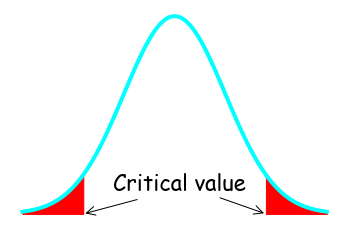

In [60]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
def comic_font():
    matplotlib.rc('font', family='Comic Sans MS')
    matplotlib.rc('text', usetex='false')
    matplotlib.rcParams.update({'font.size': 22})
comic_font()

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x, y, color='cyan', linewidth=4)
# ax.set_xticks([])
# ax.set_xticklabels([])
# ax.set_yticks([])
# ax.set_yticklabels([])
ax.axis('off')
x_critical = 1.8

xx1 = np.linspace(x_critical, mu + 3*sigma, 100)
xx2 = np.linspace(mu - 3*sigma, -x_critical, 100)
ax.fill_between(xx1, 0, stats.norm.pdf(xx1, mu, sigma), color='r')
ax.fill_between(xx2, 0, stats.norm.pdf(xx2, mu, sigma), color='r')

ax.annotate('Critical value', xy=(x_critical, 0), xytext=(x_critical-1.7, .05),
                        arrowprops={'arrowstyle': '->'}, horizontalalignment='center')
ax.annotate('', xy=(-x_critical, 0), xytext=(x_critical-2.5, .03),
                        arrowprops={'arrowstyle': '->'}
                        , horizontalalignment='center')
fig.savefig('C:/Users/nourisa/My Drive/professional/manuscripts/MSC_Mg_omics/draw/show_sig.png', dpi=200)
plt.show()